# Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from joblib import load
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import load_model

2023-07-01 15:16:20.980441: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-01 15:16:21.458801: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-01 15:16:21.462000: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-01 15:16:26.113561: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
X_test = np.load('../data/X_test.npy')
X_test_all_indices = np.load('../data/X_test_all_indices.npy')
X_test_selected_indices = np.load('../data/X_test_selected_indices.npy')
y_test = np.load('../data/y_test.npy')

scaler_test = StandardScaler()
X_test_scaled = scaler_test.fit_transform(X_test)
scaler_test_all_indices = StandardScaler()
X_test_all_indices_scaled = scaler_test_all_indices.fit_transform(X_test_all_indices)
scaler_test_selected_indices = StandardScaler()
X_test_selected_indices_scaled = scaler_test_selected_indices.fit_transform(X_test_selected_indices)

scaler_targets = StandardScaler()
y_test_scaled = scaler_targets.fit_transform(y_test.reshape(-1, 1))

In [4]:
linear_regression_10_bands = load('../models/linear_regression_10_bands.joblib')
linear_regression_all_bands = load('../models/linear_regression_all_bands.joblib')
linear_regression_selected_bands = load('../models/linear_regression_selected_bands.joblib')
knn_10_bands = load('../models/knn_10_bands.joblib')
knn_all_bands = load('../models/knn_all_bands.joblib')
knn_selected_bands = load('../models/knn_selected_bands.joblib')
decision_tree_10_bands = load('../models/decision_tree_10_bands.joblib')
decision_tree_all_bands = load('../models/decision_tree_all_bands.joblib')
decision_tree_selected_bands = load('../models/decision_tree_selected_bands.joblib')
random_forest = load('../models/random_forest.joblib')
extra_trees = load('../models/extra_trees.joblib')
adaboost = load('../models/adaboost.joblib')
xgboost = load('../models/xgboost.joblib')
mlp = load_model('../models/mlp.h5')
cnn = load_model('../models/cnn')

Create 7x7 Patches for CNN evaluation.

In [5]:
indices_test = np.load('../data/indices_test.npy')
X_full = np.stack(list(map(lambda index: np.load(f'../data/images_train/image_{index:03d}.npy'), range(40))))

KERNEL_RADIUS = 3
KERNEL_SIZE = KERNEL_RADIUS*2 + 1

expanded_indices_test = np.repeat(indices_test, (KERNEL_SIZE*KERNEL_SIZE), axis=0)

offsets = np.array([(i, j) for i in range(-KERNEL_RADIUS, KERNEL_RADIUS+1) for j in range(-KERNEL_RADIUS, KERNEL_RADIUS+1)])

# Compute new width and height indices with offsets and ensure they're within valid bounds
expanded_indices_test[:, 2] = np.clip(
    np.repeat(indices_test[:, 2], (KERNEL_SIZE*KERNEL_SIZE)) + np.tile(offsets[:, 0], len(indices_test)), 0, 1023
)
expanded_indices_test[:, 3] = np.clip(
    np.repeat(indices_test[:, 3], (KERNEL_SIZE*KERNEL_SIZE)) + np.tile(offsets[:, 1], len(indices_test)), 0, 1023
)

X_test_7x7 = X_full[expanded_indices_test[:, 0], :, expanded_indices_test[:, 2], expanded_indices_test[:, 3]]
X_test_7x7 = np.reshape(X_test_7x7, ((X_test_7x7.shape[0] // (KERNEL_SIZE*KERNEL_SIZE)), KERNEL_SIZE, KERNEL_SIZE, -1))

# Calculate the mean and standard deviation of the data
mean = np.mean(X_test_7x7)
std = np.std(X_test_7x7)
# Normalize the data
X_test_7x7 = (X_test_7x7 - mean) / std

# Compute and Visualize the Mean Absolute Error

In [6]:
y_pred_linear_regression_10_bands = linear_regression_10_bands.predict(X_test)
y_pred_linear_regreesion_all_bands = linear_regression_all_bands.predict(X_test_all_indices)
y_pred_linear_regression_selected_bands = linear_regression_selected_bands.predict(X_test_selected_indices)
y_pred_knn_10_bands = knn_10_bands.predict(X_test_scaled)
y_pred_knn_all_bands = knn_all_bands.predict(X_test_all_indices_scaled)
y_pred_knn_selected_bands = knn_selected_bands.predict(X_test_selected_indices_scaled)
y_pred_decision_tree_10_bands = decision_tree_10_bands.predict(X_test)
y_pred_decision_tree_all_bands = decision_tree_all_bands.predict(X_test_all_indices)
y_pred_decision_tree_selected_bands = decision_tree_selected_bands.predict(X_test_selected_indices)
y_pred_random_forest = random_forest.predict(X_test_all_indices)
y_pred_extra_trees = extra_trees.predict(X_test_all_indices)
y_pred_adaboost = adaboost.predict(X_test_all_indices)
y_pred_xgboost = xgboost.predict(X_test_all_indices)
y_pred_mlp = scaler_targets.inverse_transform(mlp.predict(X_test_all_indices_scaled))
y_pred_cnn = cnn.predict(X_test_7x7)

122/122 [==============================] - 1s 5ms/step


In [27]:
ercis_red = '#942738'
light_red = '#d97685'

model_predictions = [
    (y_pred_linear_regression_10_bands, 'LR (original)', ercis_red),
    (y_pred_linear_regreesion_all_bands, 'LR (all)', ercis_red),
    (y_pred_linear_regression_selected_bands, 'LR (selected)', ercis_red),
    (y_pred_knn_10_bands, 'KNN (original)', light_red),
    (y_pred_knn_all_bands, 'KNN (all)', light_red),
    (y_pred_knn_selected_bands, 'KNN (selected)', light_red),
    (y_pred_decision_tree_10_bands, 'DT (original)', ercis_red),
    (y_pred_decision_tree_all_bands, 'DT (all)', ercis_red),
    (y_pred_decision_tree_selected_bands, 'DT (selected)', ercis_red),
    (y_pred_random_forest, 'Random Forest', light_red),
    (y_pred_extra_trees, 'Extra Trees', ercis_red),
    (y_pred_adaboost, 'AdaBoost', light_red),
    (y_pred_xgboost, 'XGBoost', ercis_red),
    (y_pred_mlp, 'MLP', light_red),
    (y_pred_cnn, 'CNN', ercis_red)
]

errors = [mean_absolute_error(y_test, pred) for pred, _, _ in model_predictions]
labels = [label for _, label, _ in model_predictions]
colors = [color for _, _, color in model_predictions]

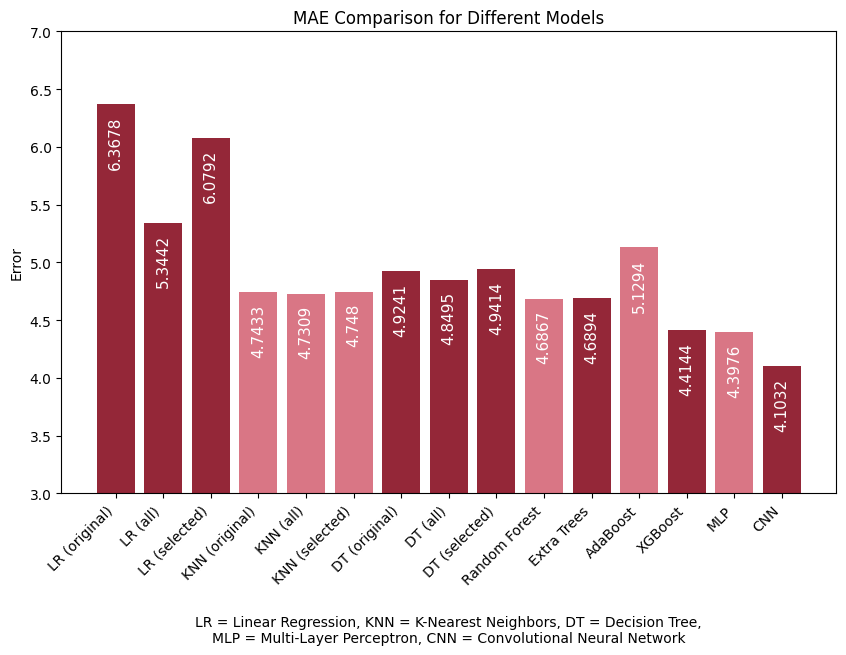

In [28]:
plt.figure(figsize=(10, 6))
bar_plot = plt.bar(labels, errors, color=colors)
plt.ylabel('Error')
plt.xlabel('LR = Linear Regression, KNN = K-Nearest Neighbors, DT = Decision Tree,\nMLP = Multi-Layer Perceptron, CNN = Convolutional Neural Network', labelpad=20)
plt.title('MAE Comparison for Different Models')
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(3, 8, 0.5))
plt.ylim([3, 7])

for bar in bar_plot:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.1,
             round(bar.get_height(), 4),
             ha='center', va='top', fontsize=11, rotation=90, color='white')

plt.savefig(f'MAE_Comparison.png', bbox_inches='tight')
plt.show()